In [2]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("/Users/tarekmourad/Desktop/GunViolenceData/ds-councilor-worrell-gun-violence/spring23-team-4/data/fio-records-2022-mark43-fieldcontact-table.csv")
display(df)

df.dtypes

,fc_num,contact_date,contact_officer,contact_officer_name,supervisor,supervisor_name,street,city,state,zip,...,basis,vehicle_year,vehicle_state,vehicle_model,vehicle_color,vehicle_style,vehicle_type,key_situations,contact_reason,weather
0,FC22000008,2022-01-01 00:00:00,151206,"WATTY-NILES, CREFTON",11586,CHRISTOPHER CARROLL,ALBANY ST,BOSTON,MA,2118,...,Reasonable Suspicion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/01/2022 11:40 PM\n\nOfficers responded to a...,NaN
1,FC22000001,2022-01-01 02:30:00,153132,"VILLEGAS-HOAG, STEPHANIE",11212,MICHAEL MCCARTHY,NaN,BOSTON,MA,2122,...,Probable Cause,2008.0,MA,Taurus,Brown,"4 Door, Sedan",Passenger Car/ Automobile,NaN,"About 02:30am, Officers assisted State Police ...",NaN
2,FC22000004,2022-01-01 09:29:00,148290,"PARHAM, ANTHONY",10845,JAMES MOORE,BRIARCLIFF,MATTAPAN,MA,2126,...,Encounter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"About 10:00AM, Saturday 1/1/21 Officers respon...",NaN
3,FC22000003,2022-01-01 10:16:00,162319,"Uhrig, Robert",9266,STEVEN CICCOLO,E EIGHTH ST,SOUTH BOSTON,MA,2127,...,Reasonable Suspicion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"About 10:16am on Saturday, 01/01/22, Officers ...",NaN
4,FC22000005,2022-01-01 10:29:00,100417,"FLYNN, THOMAS",11212,MICHAEL MCCARTHY,ROBINSON ST,DORCHESTER,MA,2122,...,Probable Cause,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Officers responded to a radio call for a B&E t...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5273,FC22005691,2022-12-31 14:18:00,144446,"BANG, SEAN",51201,TIMOTHY COUGHLIN,MAVERICK STREET,BOSTON,MA,2128,...,Intel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Intel
5274,FC22005694,2022-12-31 15:00:00,153329,"KOVALESKI, STEVEN",10652,DONALD KEENAN,MASSACHUSETTS AVE,DORCHESTER,MA,2125,...,Reasonable Suspicion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reasonable Suspicion
5275,FC22005697,2022-12-31 18:01:00,164603,"MacLeod, Sean",102682,ERIC MERNER,DORCHESTER AVE,DORCHESTER,MA,2124,...,Probable Cause,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5276,FC23000049,2022-12-31 22:45:00,162308,"Tilley, Ryan",11478,JOHN BROWN,BRAGDON ST,ROXBURY,MA,2119,...,Encounter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


fc_num                   object
contact_date             object
contact_officer           int64
contact_officer_name     object
supervisor                int64
supervisor_name          object
street                   object
city                     object
state                    object
zip                       int64
stop_duration           float64
circumstance             object
basis                    object
vehicle_year            float64
vehicle_state            object
vehicle_model            object
vehicle_color            object
vehicle_style            object
vehicle_type             object
key_situations          float64
contact_reason           object
weather                  object
dtype: object

,street,city,zip,count
1289,nan,BOSTON,2118,226
1294,nan,BOSTON,2124,149
1290,nan,BOSTON,2119,135
1292,nan,BOSTON,2121,133
1317,nan,DORCHESTER,2124,132
1315,nan,DORCHESTER,2121,102
10,ALBANY ST,BOSTON,2118,94
1331,nan,ROXBURY,2119,78
1295,nan,BOSTON,2125,75
1288,nan,BOSTON,2116,69


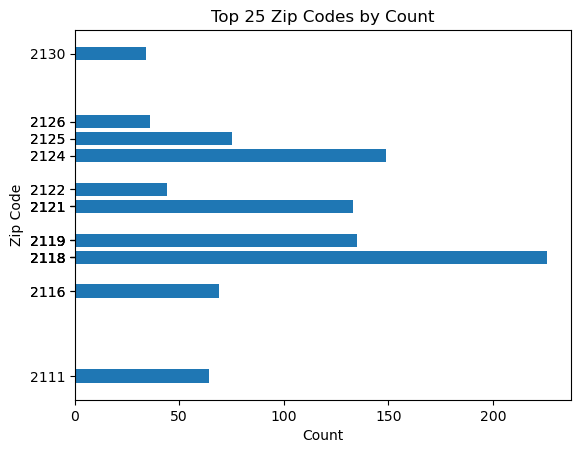

In [3]:
import numpy as np

# convert the "street" and "city" columns to string
df['street'] = df['street'].astype(str)
df['city'] = df['city'].astype(str)
# group by street, city, and zip, and aggregate by count
grouped_df = df.groupby(['street', 'city', 'zip']).agg({'zip': 'count'})


# rename the column to "count"
grouped_df.rename(columns={'zip': 'count'}, inplace=True)

# reset the index to make the grouped columns regular columns
grouped_df.reset_index(inplace=True)

# sort the grouped_df by count in descending order
grouped_df = grouped_df.sort_values(by='count', ascending=False)

display(grouped_df.head(25))

# get the top 25 zip codes by count
top_25_zipcodes = grouped_df.sort_values(by='count', ascending=False).head(25)

# filter out empty zip codes
top_25_zipcodes = top_25_zipcodes[top_25_zipcodes['zip'].notnull()]

# create a horizontal bar chart
plt.barh(top_25_zipcodes['zip'], top_25_zipcodes['count'])

# set the x-axis label
plt.xlabel('Count')

# set the y-axis label
plt.ylabel('Zip Code')

# set the title
plt.title('Top 25 Zip Codes by Count')

# set y-ticks to exact zip codes
plt.yticks(top_25_zipcodes['zip'])

# show the plot
plt.show()






In [86]:
import calendar


#Read the Field Contract data for each year from 2015 to 2022
df_2015 = pd.read_csv("/Users/tarekmourad/Desktop/GunViolenceData/ds-councilor-worrell-gun-violence/spring23-team-4/data/fieldcontactforpublic2015.csv")
df_2016 = pd.read_csv("//Users/tarekmourad/Desktop/GunViolenceData/ds-councilor-worrell-gun-violence/spring23-team-4/data/fieldcontactforpublic2016.csv")
df_2017 = pd.read_csv("/Users/tarekmourad/Desktop/GunViolenceData/ds-councilor-worrell-gun-violence/spring23-team-4/data/rms_fieldcontacts_for_public_2017_202003111424.csv")
df_2018 = pd.read_csv("/Users/tarekmourad/Desktop/GunViolenceData/ds-councilor-worrell-gun-violence/spring23-team-4/data/rms_fieldcontacts_for_public_2018_202003111433.csv")
df_2019_2 = pd.read_csv("/Users/tarekmourad/Desktop/GunViolenceData/ds-councilor-worrell-gun-violence/spring23-team-4/data/mark43_fieldcontacts_for_public_20192.csv")
df_2019_1 = pd.read_csv("/Users/tarekmourad/Desktop/GunViolenceData/ds-councilor-worrell-gun-violence/spring23-team-4/data/rms_fieldcontacts_for_public_2019.csv")
df_2020 = pd.read_csv("/Users/tarekmourad/Desktop/GunViolenceData/ds-councilor-worrell-gun-violence/spring23-team-4/data/mark43_fieldcontacts_for_public_2020_202104151551.csv")
df_2021 = pd.read_csv("/Users/tarekmourad/Desktop/GunViolenceData/ds-councilor-worrell-gun-violence/spring23-team-4/data/fio_2021-2.csv")
df_2022 = pd.read_csv("/Users/tarekmourad/Desktop/GunViolenceData/ds-councilor-worrell-gun-violence/spring23-team-4/data/fio-records-2022-mark43-fieldcontact-table.csv")

#2022 2022 2022 2022 2022 2022 2022 2022

df_2022["contact_date"] = df["contact_date"].astype(str)

df_2022["month"] = pd.to_datetime(df_2022["contact_date"]).dt.month

monthly_counts = df_2022[df_2022["contact_date"].str.startswith("2022")].groupby("month").count()["contact_date"]

df_2022["month"] = pd.to_datetime(df_2022["contact_date"]).dt.month

monthly_counts = df_2022[df_2022["contact_date"].str.startswith("2022")].groupby("month").count()["contact_date"]

# Create a list of month names
month_names = [calendar.month_name[i] for i in range(1, 13)]

# Replace the month numbers with the month names
monthly_counts.index = month_names

# Get the top 3 months by count
top_months = monthly_counts.sort_values(ascending=False).head(3).index

ax = monthly_counts.plot(kind="bar")
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Field Contacts by Month in 2022")

# Add text labels above each bar
for i, v in enumerate(monthly_counts):
    color = 'black' if monthly_counts.index[i] not in top_months else 'red'
    ax.text(i - 0.15, v + 10, str(v), color=color, fontweight='bold')

plt.show()

display(df_2022)

/var/folders/93/vh7c9yp92qb37flx_r7kc4wc0000gn/T/ipykernel_3059/2631831587.py:17: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  df_2022["contact_date"] = df["contact_date"].astype(str)


ValueError: cannot reindex on an axis with duplicate labels

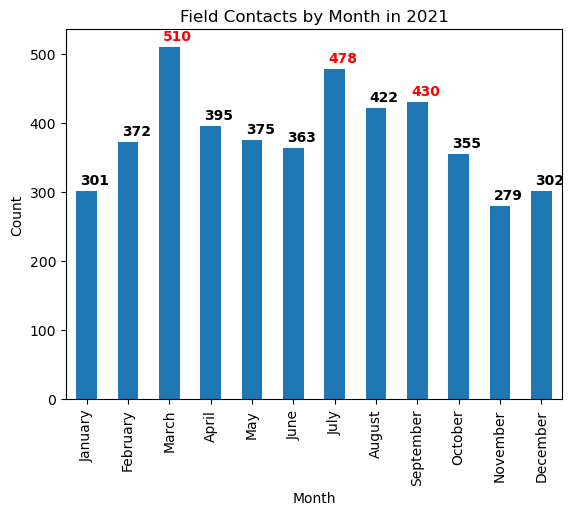

fc_num                   object
contact_date             object
contact_officer           int64
contact_officer_name     object
supervisor                int64
supervisor_name          object
street                   object
city                     object
state                    object
zip                       int64
stop_duration           float64
circumstance             object
basis                    object
vehicle_year            float64
vehicle_state            object
vehicle_model            object
vehicle_color            object
vehicle_style            object
vehicle_type             object
key_situations          float64
contact_reason           object
weather                  object
dtype: object

In [85]:
#2021 2021 2021 2021 2021 2021 2021 2021

df_2021 = pd.read_csv("/Users/tarekmourad/Desktop/GunViolenceData/ds-councilor-worrell-gun-violence/spring23-team-4/data/fio_2021-2.csv")

df_2021["month"] = pd.to_datetime(df_2021["contact_date"]).dt.month

monthly_counts = df_2021[df_2021["contact_date"].str.startswith("2021")].groupby("month").count()["contact_date"]

# Create a list of month names
month_names = [calendar.month_name[i] for i in range(1, 13)]

# Replace the month numbers with the month names
monthly_counts.index = month_names

# Get the top 3 months by count
top_months = monthly_counts.sort_values(ascending=False).head(3).index

ax = monthly_counts.plot(kind="bar")
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Field Contacts by Month in 2021")

# Add text labels above each bar
for i, v in enumerate(monthly_counts):
    color = 'black' if monthly_counts.index[i] not in top_months else 'red'
    ax.text(i - 0.15, v + 10, str(v), color=color, fontweight='bold')

plt.show()
df_2022.dtypes

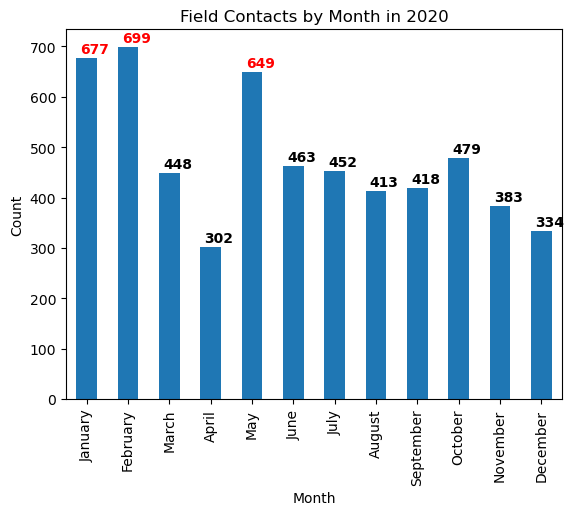

In [9]:
#2020 2020 2020 2020 2020 2020

df_2020["month"] = pd.to_datetime(df_2020["contact_date"]).dt.month

monthly_counts = df_2020[df_2020["contact_date"].str.startswith("2020")].groupby("month").count()["contact_date"]

# Create a list of month names
month_names = [calendar.month_name[i] for i in range(1, 13)]

# Replace the month numbers with the month names
monthly_counts.index = month_names

# Get the top 3 months by count
top_months = monthly_counts.sort_values(ascending=False).head(3).index

ax = monthly_counts.plot(kind="bar")
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Field Contacts by Month in 2020")

# Add text labels above each bar
for i, v in enumerate(monthly_counts):
    color = 'black' if monthly_counts.index[i] not in top_months else 'red'
    ax.text(i - 0.15, v + 10, str(v), color=color, fontweight='bold')

plt.show()

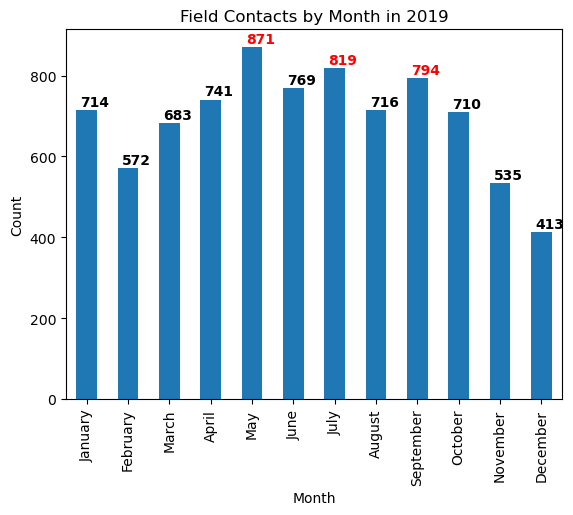

In [10]:
#2019 2019 2019 2019 2019 2019 2019 2019

df_2019 = pd.concat([df_2019_1, df_2019_2])

df_2019["month"] = pd.to_datetime(df_2019["contact_date"]).dt.month

monthly_counts = df_2019[df_2019["contact_date"].str.startswith("2019")].groupby("month").count()["contact_date"]

# Create a list of month names
month_names = [calendar.month_name[i] for i in range(1, 13)]

# Replace the month numbers with the month names
monthly_counts.index = month_names

# Get the top 3 months by count
top_months = monthly_counts.sort_values(ascending=False).head(3).index

ax = monthly_counts.plot(kind="bar")
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Field Contacts by Month in 2019")

# Add text labels above each bar
for i, v in enumerate(monthly_counts):
    color = 'black' if monthly_counts.index[i] not in top_months else 'red'
    ax.text(i - 0.15, v + 10, str(v), color=color, fontweight='bold')

plt.show()

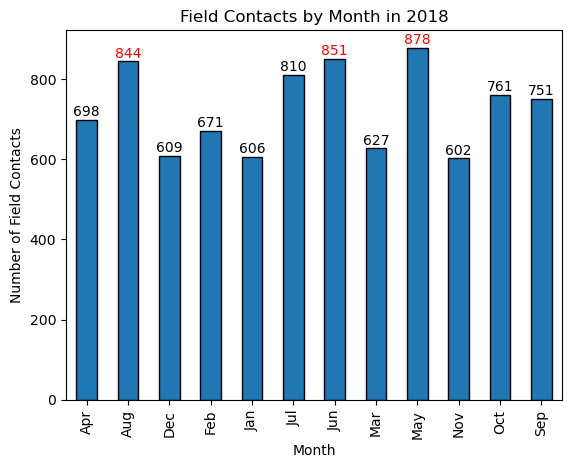

In [11]:
# Convert contact_date column to datetime
df_2018['contact_date'] = pd.to_datetime(df_2018['contact_date'], format='%m/%d/%Y %H:%M')

# Group the data by month and count the number of field contacts
monthly_counts = df_2018.groupby(df_2018['contact_date'].dt.strftime('%b'))['contact_date'].count()

# Get the top 3 months
top_3 = monthly_counts.nlargest(3)

# Create a bar chart
ax = monthly_counts.plot(kind='bar', color='C0', edgecolor='black')

# Add labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Number of Field Contacts')
ax.set_title('Field Contacts by Month in 2018')

# Add the count above each bar
for i, v in enumerate(monthly_counts):
    if v in top_3.values:
        ax.text(i, v+10, str(v), ha='center', color='red')
    else:
        ax.text(i, v+10, str(v), ha='center')

# Show the plot
plt.show()

contact_date
2016-01    802
2016-02    889
2016-03    928
2016-04    884
2016-05    855
          ... 
2022-08    399
2022-09    411
2022-10    510
2022-11    458
2022-12    405
Name: fc_num, Length: 84, dtype: int64


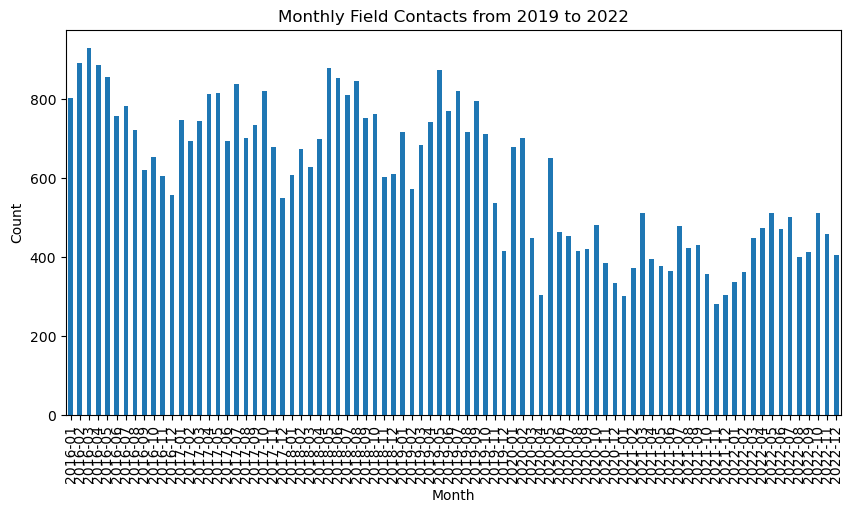

In [18]:
# Concatenate the data frames into one
df = pd.concat([df_2018, df_2017, df_2016, df_2019_1, df_2019_2, df_2020, df_2021, df_2022])

# Convert the contact_date column to datetime format
df['contact_date'] = pd.to_datetime(df['contact_date'])

# Group the data by month and count the number of contacts in each month
monthly_counts = df.groupby(df['contact_date'].dt.strftime('%Y-%m'))['fc_num'].count()

print(monthly_counts)

# Plot the monthly counts in a bar chart
monthly_counts.plot(kind='bar', figsize=(10,5))

# Set the title and axis labels
plt.title('Monthly Field Contacts from 2019 to 2022')
plt.xlabel('Month')
plt.ylabel('Count')

# Show the plot
plt.show()

Total number of field contacts for January in all years: 4180
Total number of field contacts for February in all years: 4258
Total number of field contacts for April in all years: 4304
Total number of field contacts for May in all years: 4950
Total number of field contacts for June in all years: 4363
Total number of field contacts for December in all years: 3167
Total number of field contacts for March in all years: 4386
Total number of field contacts for November in all years: 3538
Total number of field contacts for July in all years: 4677
Total number of field contacts for October in all years: 4285
Total number of field contacts for August in all years: 4214
Total number of field contacts for September in all years: 4157


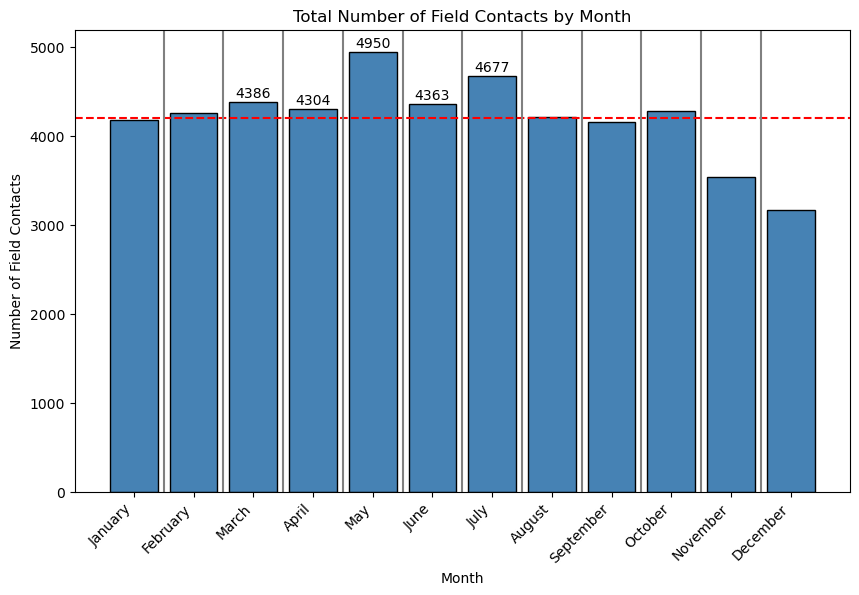

In [92]:
df_2022 = pd.read_csv("/Users/tarekmourad/Desktop/GunViolenceData/ds-councilor-worrell-gun-violence/spring23-team-4/data/fio-records-2022-mark43-fieldcontact-table.csv")

# Concatenate the data frames into one
df = pd.concat([df_2016, df_2017, df_2018, df_2019_1, df_2019_2, df_2020, df_2021, df_2022])

# Convert the contact_date column to datetime format
df['contact_date'] = pd.to_datetime(df['contact_date'])

# Filter the data to include only January entries
january_data = df[df['contact_date'].dt.month == 1]

# Group the January data by year and count the number of contacts in each year
january_counts = january_data.groupby(january_data['contact_date'].dt.year)['fc_num'].count()

# Convert the contact_date column to datetime format
df['contact_date'] = pd.to_datetime(df['contact_date'])

# Filter the data to include only February entries
february_data = df[df['contact_date'].dt.month == 2]

# Group the February data by year and count the number of contacts in each year
february_counts = february_data.groupby(february_data['contact_date'].dt.year)['fc_num'].count()


march_data = df[df['contact_date'].dt.month == 3]
april_data = df[df['contact_date'].dt.month == 4]
may_data = df[df['contact_date'].dt.month == 5]
june_data = df[df['contact_date'].dt.month == 6]
july_data = df[df['contact_date'].dt.month == 7]
august_data = df[df['contact_date'].dt.month == 8]
september_data = df[df['contact_date'].dt.month == 9]
october_data = df[df['contact_date'].dt.month == 10]
november_data = df[df['contact_date'].dt.month == 11]
december_data = df[df['contact_date'].dt.month == 12]

# Group the data by year and count the number of contacts in each year
march_counts = march_data.groupby(march_data['contact_date'].dt.year)['fc_num'].count()
april_counts = april_data.groupby(april_data['contact_date'].dt.year)['fc_num'].count()
may_counts = may_data.groupby(may_data['contact_date'].dt.year)['fc_num'].count()
june_counts = june_data.groupby(june_data['contact_date'].dt.year)['fc_num'].count()
july_counts = july_data.groupby(july_data['contact_date'].dt.year)['fc_num'].count()
august_counts = august_data.groupby(august_data['contact_date'].dt.year)['fc_num'].count()
september_counts = september_data.groupby(september_data['contact_date'].dt.year)['fc_num'].count()
october_counts = october_data.groupby(october_data['contact_date'].dt.year)['fc_num'].count()
november_counts = november_data.groupby(november_data['contact_date'].dt.year)['fc_num'].count()
december_counts = december_data.groupby(december_data['contact_date'].dt.year)['fc_num'].count()

# Print the total number of field contacts for each month in all years
print("Total number of field contacts for January in all years: {}".format(january_counts.sum()))
print("Total number of field contacts for February in all years: {}".format(february_counts.sum()))
print("Total number of field contacts for April in all years: {}".format(april_counts.sum()))
print("Total number of field contacts for May in all years: {}".format(may_counts.sum()))
print("Total number of field contacts for June in all years: {}".format(june_counts.sum()))
print("Total number of field contacts for December in all years: {}".format(december_counts.sum()))
print("Total number of field contacts for March in all years: {}".format(march_counts.sum()))
print("Total number of field contacts for November in all years: {}".format(november_counts.sum()))
print("Total number of field contacts for July in all years: {}".format(july_counts.sum()))
print("Total number of field contacts for October in all years: {}".format(october_counts.sum()))
print("Total number of field contacts for August in all years: {}".format(august_counts.sum()))
print("Total number of field contacts for September in all years: {}".format(september_counts.sum()))

import matplotlib.pyplot as plt

# Define the names of the months
months = ['January', 'February', 'March', 'April', 'May', 'June', 
          'July', 'August', 'September', 'October', 'November', 'December']

# Define the counts of field contacts for each month
counts = [4180, 4258, 4386, 4304, 4950, 4363, 4677, 4214, 4157, 4285, 3538, 3167]


# find the indices of the top 5 months
top5_indices = sorted(range(len(counts)), key=lambda i: counts[i], reverse=True)[:5]

# plot the histogram
plt.figure(figsize=(10,6))
plt.bar(range(len(counts)), counts, color='steelblue', edgecolor='black')
plt.xticks(range(len(counts)), [months[i] for i in range(len(counts))], rotation=45, ha='right')

# add the count values on the top 5 bars
for i in top5_indices:
    plt.text(i, counts[i]+50, counts[i], ha='center')

# add a horizontal line for the average count
avg_count = sum(counts)/len(counts)

plt.axhline(y=avg_count, color='red', linestyle='--')

# add vertical lines to separate the bars
for i in range(len(counts)-1):
    plt.axvline(x=i+0.5, color='gray', linestyle='-')

# set axis labels and title
plt.xlabel('Month')
plt.ylabel('Number of Field Contacts')
plt.title('Total Number of Field Contacts by Month')

# show the plot
plt.show()



Count of Field Contacts in district C11 (02122)in 2022: 250
Count of Field Contacts in district B3 (2124/2126)in 2022: 936
Count of Field Contacts in district E13 (2130)in 2022: 338
Count of Field Contacts in district D4 (02118)in 2022: 338


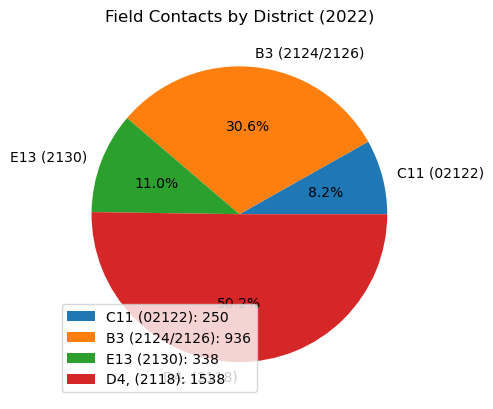

In [127]:

df_2022['zip'] = df_2022['zip'].astype(str)


count_C11 = (df_2022['zip'].str.contains('2122', regex=False)).sum()
print("Count of Field Contacts in district C11 (02122)in 2022:", count_C11)

count_B3 = (df_2022['zip'].str.contains('2124', regex=False)).sum() + (df_2022['zip'].str.contains('2126', regex=False)).sum()
print("Count of Field Contacts in district B3 (2124/2126)in 2022:", count_B3)

count_E13 = (df_2022['zip'].str.contains('2130', regex=False)).sum() + (df_2022['zip'].str.contains('2130', regex=False)).sum()
print("Count of Field Contacts in district E13 (2130)in 2022:", count_E13)

count_D4 = (df_2022['zip'].str.contains('2118', regex=False)).sum() + (df_2022['zip'].str.contains('2118', regex=False)).sum()
print("Count of Field Contacts in district D4 (02118)in 2022:", count_E13)

import matplotlib.pyplot as plt

# Data
districts = ['C11 (02122)', 'B3 (2124/2126)', 'E13 (2130)', 'D4, (2118)']
counts = [count_C11, count_B3, count_E13, count_D4]

# Plot
plt.pie(counts, labels=districts, autopct='%1.1f%%')
plt.title('Field Contacts by District (2022)')

# Legend
legend_labels = [f'{districts[i]}: {counts[i]}' for i in range(len(districts))]
plt.legend(legend_labels, loc='best')

# Show plot
plt.show()

Count of Field Contacts in district C11 (02122)in 2020: 176
Count of Field Contacts in district B3 (2124/2126)in 2020: 635
Count of Field Contacts in district E13 (2130)in 2020: 342
Count of Field Contacts in district D4 (02118)in 2022: 342


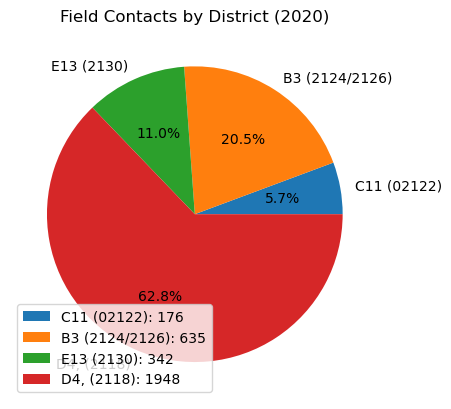

In [128]:
df_2020['zip'] = df_2020['zip'].astype(str)


count_C11 = (df_2020['zip'].str.contains('2122', regex=False)).sum()
print("Count of Field Contacts in district C11 (02122)in 2020:", count_C11)

count_B3 = (df_2020['zip'].str.contains('2124', regex=False)).sum() + (df_2020['zip'].str.contains('2126', regex=False)).sum()
print("Count of Field Contacts in district B3 (2124/2126)in 2020:", count_B3)

count_E13 = (df_2020['zip'].str.contains('2130', regex=False)).sum() + (df_2020['zip'].str.contains('2130', regex=False)).sum()
print("Count of Field Contacts in district E13 (2130)in 2020:", count_E13)

count_D4 = (df_2020['zip'].str.contains('2118', regex=False)).sum() + (df_2020['zip'].str.contains('2118', regex=False)).sum()
print("Count of Field Contacts in district D4 (02118)in 2022:", count_E13)

import matplotlib.pyplot as plt

# Data
districts = ['C11 (02122)', 'B3 (2124/2126)', 'E13 (2130)', 'D4, (2118)']
counts = [count_C11, count_B3, count_E13, count_D4]

# Plot
plt.pie(counts, labels=districts, autopct='%1.1f%%')
plt.title('Field Contacts by District (2020)')

# Legend
legend_labels = [f'{districts[i]}: {counts[i]}' for i in range(len(districts))]
plt.legend(legend_labels, loc='best')

# Show plot
plt.show()

Count of Field Contacts in district C11 (02122)in 2021: 227
Count of Field Contacts in district B3 (2124/2126)in 2021: 618
Count of Field Contacts in district E13 (2130)in 2021: 330
Count of Field Contacts in district D4 (02118)in 2022: 330


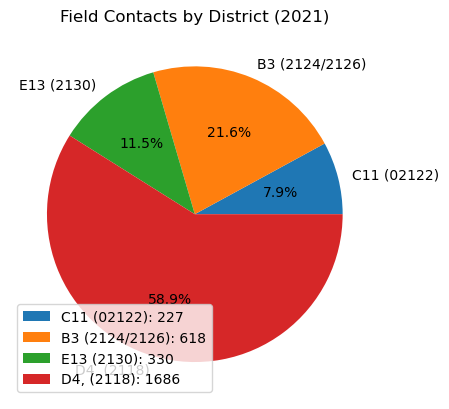

In [129]:
df_2021['zip'] = df_2021['zip'].astype(str)


count_C11 = (df_2021['zip'].str.contains('2122', regex=False)).sum()
print("Count of Field Contacts in district C11 (02122)in 2021:", count_C11)

count_B3 = (df_2021['zip'].str.contains('2124', regex=False)).sum() + (df_2021['zip'].str.contains('2126', regex=False)).sum()
print("Count of Field Contacts in district B3 (2124/2126)in 2021:", count_B3)

count_E13 = (df_2021['zip'].str.contains('2130', regex=False)).sum() + (df_2021['zip'].str.contains('2130', regex=False)).sum()
print("Count of Field Contacts in district E13 (2130)in 2021:", count_E13)

count_D4 = (df_2021['zip'].str.contains('2118', regex=False)).sum() + (df_2021['zip'].str.contains('2118', regex=False)).sum()
print("Count of Field Contacts in district D4 (02118)in 2022:", count_E13)

import matplotlib.pyplot as plt

# Data
districts = ['C11 (02122)', 'B3 (2124/2126)', 'E13 (2130)', 'D4, (2118)']
counts = [count_C11, count_B3, count_E13, count_D4]

# Plot
plt.pie(counts, labels=districts, autopct='%1.1f%%')
plt.title('Field Contacts by District (2021)')

# Legend
legend_labels = [f'{districts[i]}: {counts[i]}' for i in range(len(districts))]
plt.legend(legend_labels, loc='best')

# Show plot
plt.show()

Count of Field Contacts in district C11 (02122)in 2019: 246
Count of Field Contacts in district B3 (2124/2126)in 2019: 973
Count of Field Contacts in district E13 (2130)in 2019: 592
Count of Field Contacts in district D4 (02118)in 2022: 592


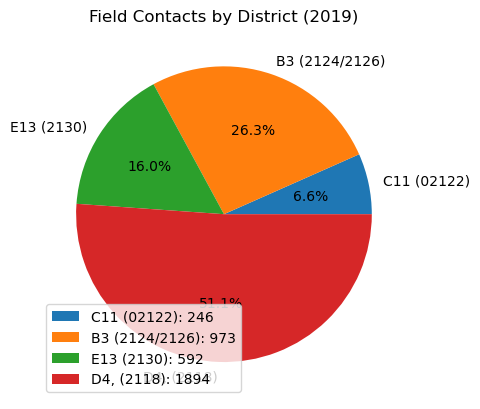

In [130]:
# Concatenate the data frames into one
df_2019 = pd.concat([df_2019_1, df_2019_2])

df_2019['zip'] = df_2019['zip'].astype(str)

count_C11 = (df_2019['zip'].str.contains('2122', regex=False)).sum()
print("Count of Field Contacts in district C11 (02122)in 2019:", count_C11)

count_B3 = (df_2019['zip'].str.contains('2124', regex=False)).sum() + (df_2019['zip'].str.contains('2126', regex=False)).sum()
print("Count of Field Contacts in district B3 (2124/2126)in 2019:", count_B3)

count_E13 = (df_2019['zip'].str.contains('2130', regex=False)).sum() + (df_2019['zip'].str.contains('2130', regex=False)).sum()
print("Count of Field Contacts in district E13 (2130)in 2019:", count_E13)

count_D4 = (df_2019['zip'].str.contains('2118', regex=False)).sum() + (df_2019['zip'].str.contains('2118', regex=False)).sum()
print("Count of Field Contacts in district D4 (02118)in 2022:", count_E13)

import matplotlib.pyplot as plt

# Data
districts = ['C11 (02122)', 'B3 (2124/2126)', 'E13 (2130)', 'D4, (2118)']
counts = [count_C11, count_B3, count_E13, count_D4]

# Plot
plt.pie(counts, labels=districts, autopct='%1.1f%%')
plt.title('Field Contacts by District (2019)')

# Legend
legend_labels = [f'{districts[i]}: {counts[i]}' for i in range(len(districts))]
plt.legend(legend_labels, loc='best')

# Show plot
plt.show()

Count of Field Contacts in district C11 (02122)in 2018: 329
Count of Field Contacts in district B3 (2124/2126)in 2018: 1010
Count of Field Contacts in district E13 (2130)in 2018: 1068
Count of Field Contacts in district D4 (02118)in 2022: 1068


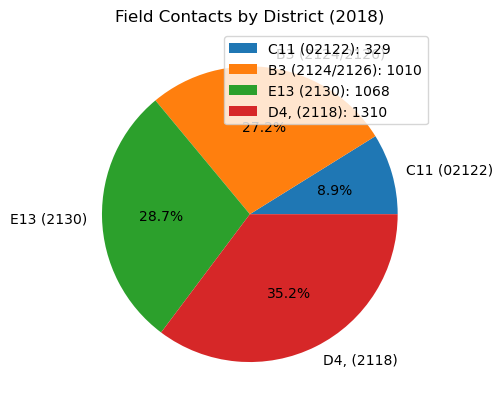

In [134]:
# Concatenate the data frames into one

df_2018['zip'] = df_2018['zip'].astype(str)

count_C11 = (df_2018['zip'].str.contains('2122', regex=False)).sum()
print("Count of Field Contacts in district C11 (02122)in 2018:", count_C11)

count_B3 = (df_2018['zip'].str.contains('2124', regex=False)).sum() + (df_2018['zip'].str.contains('2126', regex=False)).sum()
print("Count of Field Contacts in district B3 (2124/2126)in 2018:", count_B3)

count_E13 = (df_2018['zip'].str.contains('2130', regex=False)).sum() + (df_2018['zip'].str.contains('2130', regex=False)).sum()
print("Count of Field Contacts in district E13 (2130)in 2018:", count_E13)

count_D4 = (df_2018['zip'].str.contains('2118', regex=False)).sum() + (df_2018['zip'].str.contains('2118', regex=False)).sum()
print("Count of Field Contacts in district D4 (02118)in 2022:", count_E13)

import matplotlib.pyplot as plt

# Data
districts = ['C11 (02122)', 'B3 (2124/2126)', 'E13 (2130)', 'D4, (2118)']
counts = [count_C11, count_B3, count_E13, count_D4]

# Plot
plt.pie(counts, labels=districts, autopct='%1.1f%%')
plt.title('Field Contacts by District (2018)')

# Legend
legend_labels = [f'{districts[i]}: {counts[i]}' for i in range(len(districts))]
plt.legend(legend_labels, loc='best')

# Show plot
plt.show()

Count of Field Contacts in district C11 (02122)in 2017: 471
Count of Field Contacts in district B3 (2124/2126)in 2017: 1150
Count of Field Contacts in district E13 (2130)in 2017: 710
Count of Field Contacts in district D4 (02118)in 2022: 710


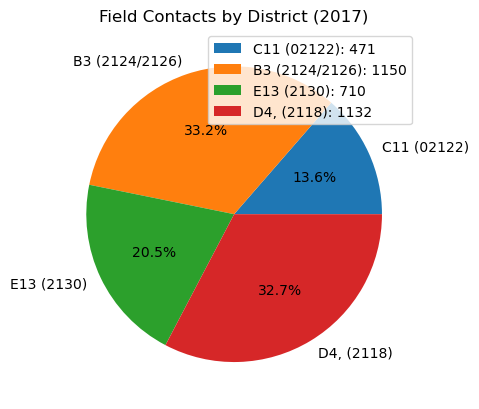

In [135]:
# Concatenate the data frames into one

df_2017['zip'] = df_2017['zip'].astype(str)

count_C11 = (df_2017['zip'].str.contains('2122', regex=False)).sum()
print("Count of Field Contacts in district C11 (02122)in 2017:", count_C11)

count_B3 = (df_2017['zip'].str.contains('2124', regex=False)).sum() + (df_2017['zip'].str.contains('2126', regex=False)).sum()
print("Count of Field Contacts in district B3 (2124/2126)in 2017:", count_B3)

count_E13 = (df_2017['zip'].str.contains('2130', regex=False)).sum() + (df_2017['zip'].str.contains('2130', regex=False)).sum()
print("Count of Field Contacts in district E13 (2130)in 2017:", count_E13)

count_D4 = (df_2017['zip'].str.contains('2118', regex=False)).sum() + (df_2017['zip'].str.contains('2118', regex=False)).sum()
print("Count of Field Contacts in district D4 (02118)in 2022:", count_E13)

import matplotlib.pyplot as plt

# Data
districts = ['C11 (02122)', 'B3 (2124/2126)', 'E13 (2130)', 'D4, (2118)']
counts = [count_C11, count_B3, count_E13, count_D4]

# Plot
plt.pie(counts, labels=districts, autopct='%1.1f%%')
plt.title('Field Contacts by District (2017)')

# Legend
legend_labels = [f'{districts[i]}: {counts[i]}' for i in range(len(districts))]
plt.legend(legend_labels, loc='best')

# Show plot
plt.show()

Count of Field Contacts not in district C11 E13 or B3: 157013
Count of Field Contacts in district C11 E13 or B3: 8711


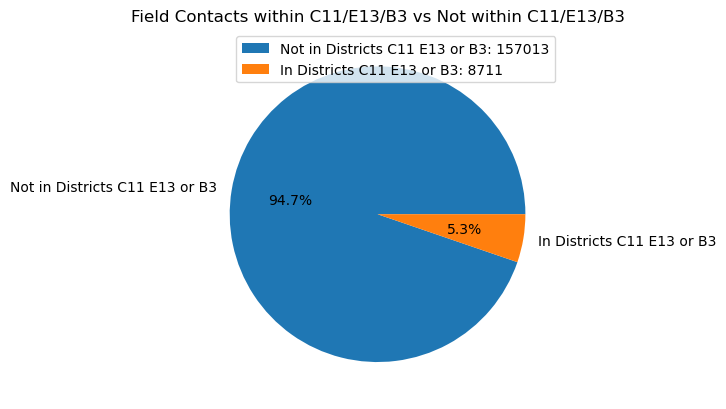

In [122]:
df = pd.concat([df_2017, df_2018, df_2019, df_2020, df_2021, df_2022])

count_notin = (~df['zip'].str.contains('2122', regex=False)).sum() + (~df['zip'].str.contains('2124', regex=False)).sum() + (~df['zip'].str.contains('2126', regex=False)).sum() + (~df['zip'].str.contains('2130', regex=False)).sum()
print("Count of Field Contacts not in district C11 E13 or B3:", count_notin)

count_in = (df['zip'].str.contains('2122', regex=False)).sum() + (df['zip'].str.contains('2124', regex=False)).sum() + (df['zip'].str.contains('2126', regex=False)).sum() + (df['zip'].str.contains('2130', regex=False)).sum()
print("Count of Field Contacts in district C11 E13 or B3:", count_in)

import matplotlib.pyplot as plt

# Data
districts = ['Not in Districts C11 E13 or B3', 'In Districts C11 E13 or B3']
counts = [count_notin, count_in]

# Plot
plt.pie(counts, labels=districts, autopct='%1.1f%%')
plt.title('Field Contacts within C11/E13/B3 vs Not within C11/E13/B3')

# Legend
legend_labels = [f'{districts[i]}: {counts[i]}' for i in range(len(districts))]
plt.legend(legend_labels, loc='best')

# Show plot
plt.show()

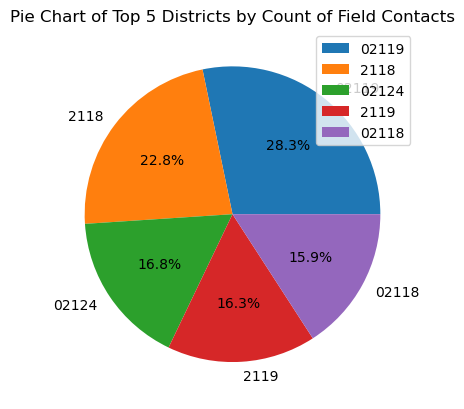

In [126]:
# Get the count of unique zip codes and sort them in decreasing order
zip_count = df['zip'].value_counts().sort_values(ascending=False)

# Get the top 5 zip codes and their corresponding count percentages
top_5_zip = zip_count[:5]
total_count = top_5_zip.sum()
percentages = [(count / total_count) * 100 for count in top_5_zip.values]

# Create a pie chart
labels = top_5_zip.index.tolist()
plt.pie(percentages, labels=labels, autopct='%1.1f%%')

# Add a legend
plt.legend(loc='best')

plt.title('Pie Chart of Top 5 Districts by Count of Field Contacts')

# Display the chart
plt.show()